In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

C:\Users\supratim datta\JavaProjects\DataSciencePractice\mnist\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
x_train[0].shape

(28, 28)

In [5]:
x_train=x_train/255
x_test=x_test/255

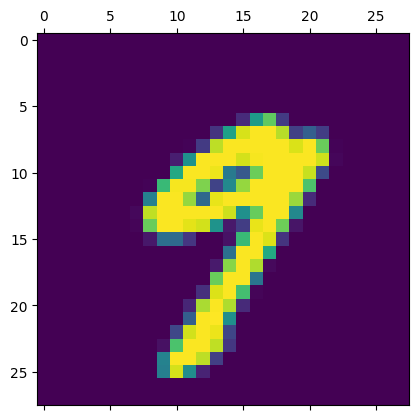

In [6]:
plt.matshow(x_test[20])

In [7]:
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

C:\Users\supratim datta\JavaProjects\DataSciencePractice\mnist\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9263 - loss: 0.2492
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9678 - loss: 0.1049
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9770 - loss: 0.0729
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9822 - loss: 0.0559
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9850 - loss: 0.0451


In [8]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9756 - loss: 0.0808


[0.08076652139425278, 0.975600004196167]

In [9]:
y_predicted=model.predict(x_test)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Text(95.72222222222221, 0.5, 'truth')

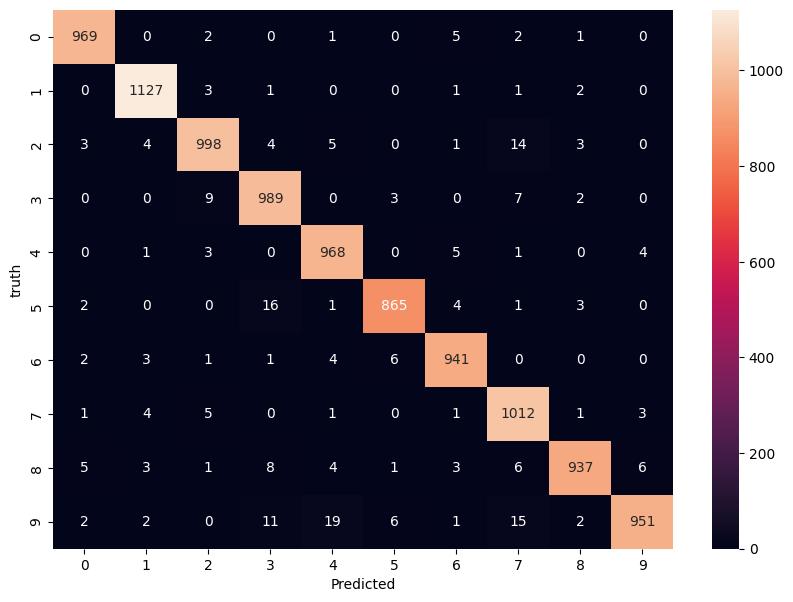

In [10]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('truth')

In [11]:
model.save("mnist.h5")
model.export("./mnist_savedmodel")

INFO:tensorflow:Assets written to: ./mnist_savedmodel\assets


INFO:tensorflow:Assets written to: ./mnist_savedmodel\assets


Saved artifact at './mnist_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2146740332944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2146740334864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2146740334288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2146740334672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2146740335056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2146740333712: TensorSpec(shape=(), dtype=tf.resource, name=None)
